In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import time

from scipy import special, stats

sns.set(style="white", font_scale=2.0)

In [2]:
# from palettable import wesanderson as wa_palettes

# palette = wa_palettes.Darjeeling2_5
# palette = palette.hex_colors
# sns.palplot(palette)
# sns.set_palette(palette)

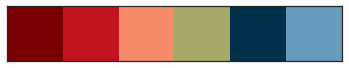

In [3]:
palette = ["#780000", "#C1121F", "#F78C6B", "#A6A867", "#003049", "#669BBC"]
sns.palplot(palette)
sns.set_palette(palette)

In [4]:
n = 16
alpha = 1 / math.sqrt(n)

seed = np.random.randint(0, 1000) + int(time.time()) // int(1e6)
seed = 1849

print(seed)
random.seed(seed)
np.random.seed(seed)

scores = np.random.rand(n)
scores[0] = scores[-1] - 0.25
weights = np.exp(np.random.rand(n) / 0.5)
weights /= weights.sum()

obs_idxs = np.arange(n)
where_leq_last = np.where(scores <= scores[-1])
where_geq_last = np.where(scores >= scores[-1])

1849


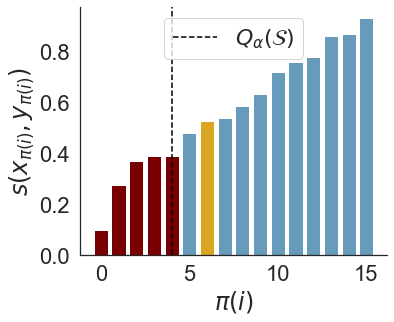

In [5]:
fig = plt.figure(figsize=(6, 5))

cutoff_idx = int(alpha * n)
score_argsort = np.argsort(scores)
score_ranks = np.argsort(score_argsort)
sorted_scores = scores[score_argsort]

plt.bar(np.arange(n)[:cutoff_idx + 1], sorted_scores[:cutoff_idx + 1], color=palette[0])
plt.bar(np.arange(n)[cutoff_idx + 1:], sorted_scores[cutoff_idx + 1:], color=palette[-1])
plt.bar(np.arange(n)[score_ranks[-1]], scores[-1], color='goldenrod')

plt.ylim(plt.ylim())
plt.vlines(alpha * n, *plt.ylim(), color='black', linestyle='--', label=r'$Q_\alpha(\mathcal{S})$')

plt.xlabel(r'$\pi(i)$')
plt.ylabel(r'$s(x_{\pi(i)}, y_{\pi(i)})$')
sns.despine()
plt.legend(loc='upper center')
plt.tight_layout()

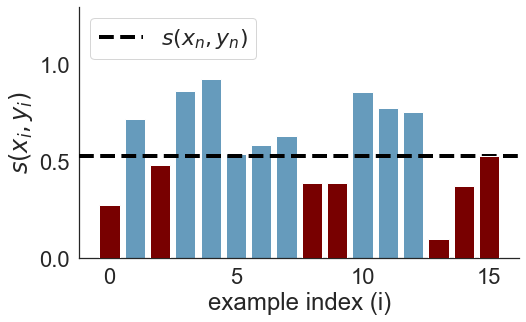

In [6]:
import itertools

# palette_idxs = range(len(palette))
# for i, j in itertools.product(palette_idxs, palette_idxs):
#     if i == j:
#         continue
    
fig = plt.figure(figsize=(8, 5))

plt.bar(obs_idxs[where_leq_last], scores[where_leq_last], alpha=1., zorder=3, color=palette[0])
plt.bar(obs_idxs[where_geq_last], scores[where_geq_last], alpha=1., zorder=2, color=palette[-1])

plt.xlim(plt.xlim())
plt.hlines(scores[-1], *plt.xlim(), color='black', linestyle='--', label=r'$s(x_n, y_n)$', linewidth=4, zorder=3)
plt.xlabel(r'example index (i)')
plt.ylabel(r'$s(x_i, y_i)$')
plt.legend(loc='upper left')
plt.ylim((0, 1.3))
sns.despine()
plt.tight_layout()

plt.savefig(f'./figures/conf_scores_barplot_v0.0.3.pdf')

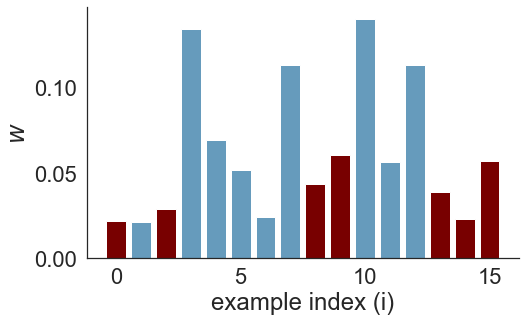

In [7]:
fig = plt.figure(figsize=(8, 5))

plt.bar(obs_idxs[where_leq_last], weights[where_leq_last], alpha=1., zorder=2, color=palette[0])
plt.bar(obs_idxs[where_geq_last], weights[where_geq_last], alpha=1., zorder=1, color=palette[-1])
# plt.bar(obs_idxs, weights)

# plt.xlim(plt.xlim())
# plt.hlines(alpha, *plt.xlim(), color='black', linestyle='--', label=r'$\alpha$')

plt.xlabel('example index (i)')
plt.ylabel(r'$w$')
# plt.legend(loc='upper left')
sns.despine()
plt.tight_layout()

plt.savefig(f'./figures/imp_weights_barplot_v0.0.3.pdf')

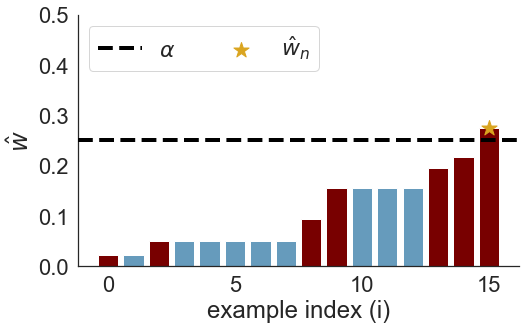

In [8]:
cum_weights = np.copy(weights)
cum_weights[scores > scores[-1]] = 0
cum_weights = cum_weights.cumsum()

fig = plt.figure(figsize=(8, 5))

plt.bar(obs_idxs[where_leq_last], cum_weights[where_leq_last], alpha=1., zorder=2, color=palette[0])
plt.bar(obs_idxs[where_geq_last], cum_weights[where_geq_last], alpha=1., zorder=1, color=palette[-1])

plt.xlim(plt.xlim())
plt.hlines(alpha, *plt.xlim(), color='black', linestyle='--', label=r'$\alpha$', linewidth=4, zorder=3)

plt.scatter(obs_idxs[-1], cum_weights[-1], zorder=3, marker='*', color='goldenrod', label=r'$\hat{w}_n$', s=256)

plt.xlabel('example index (i)')
plt.ylabel(r'$\hat{w}$')
plt.legend(loc='upper left', ncol=2)
sns.despine()
plt.tight_layout()

plt.ylim(0, 0.5)

plt.savefig(f'./figures/cum_imp_weights_barplot_v0.0.3.pdf')

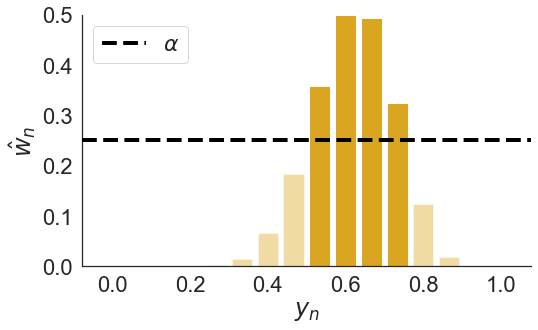

In [9]:
y_cand = np.sort(np.linspace(0, 1, n))
bar_width = 0.8 * (y_cand[1:] - y_cand[:-1]).mean()
cum_weights = stats.beta.pdf(y_cand, 13, 8)
cum_weights /= 2 * (cum_weights.max() - cum_weights.min())

where_geq_alpha = np.where(cum_weights >= alpha)
where_leq_alpha = np.where(cum_weights <= alpha)

fig = plt.figure(figsize=(8, 5))

color = 'goldenrod'  # palette[2]
plt.bar(y_cand[where_geq_alpha], cum_weights[where_geq_alpha], width=bar_width, zorder=2, color=color)
color = 'goldenrod'  # palette[4]
plt.bar(y_cand[where_leq_alpha], cum_weights[where_leq_alpha], width=bar_width, zorder=1, color=color, alpha=0.4)

plt.xlim(plt.xlim())
plt.hlines(alpha, *plt.xlim(), color='black', linestyle='--', label=r'$\alpha$', linewidth=4, zorder=3)

plt.xlabel(r"$y_n$")
plt.ylabel(r"$\hat{w}_n$")
plt.legend(loc="upper left")

sns.despine()
plt.tight_layout()
plt.ylim(0, 0.5)

plt.savefig(f'./figures/conf_pred_set_barplot_v0.0.3.pdf')